In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\HC and Training Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,trainer_name,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,Ibun,6000000.0,50,5,17,19,HC and Training Series,People (HR) Analytics for HR & Non HR Professi...,How to Conduct Social Campaign (for the Benefi...,People (HR) Analytics for HR & Non HR Professi...
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,Reza,4800000.0,60,5,17,19,HC and Training Series,People (HR) Analytics for HR & Non HR Professi...,Digital Mindset & Capability Debelopment,People (HR) Analytics for HR & Non HR Professi...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,Ibun,6000000.0,50,5,17,18,HC and Training Series,People (HR) Analytics for HR & Non HR Professi...,Digital Mindset & Capability Debelopment,People (HR) Analytics for HR & Non HR Professi...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,Reza,6000000.0,50,5,17,20,HC and Training Series,People (HR) Analytics for HR & Non HR Professi...,Digital Mindset & Capability Debelopment,People (HR) Analytics for HR & Non HR Professi...
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,Haris,4300000.0,60,5,16,20,HC and Training Series,People (HR) Analytics for HR & Non HR Professi...,Digital Mindset & Capability Debelopment,People (HR) Analytics for HR & Non HR Professi...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop("cross_selling", axis=1, inplace=True)

In [5]:
X = df.drop("upselling", axis=1)
y = df["upselling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = joblib.load("./pipeline_save/pipeline3.joblib")

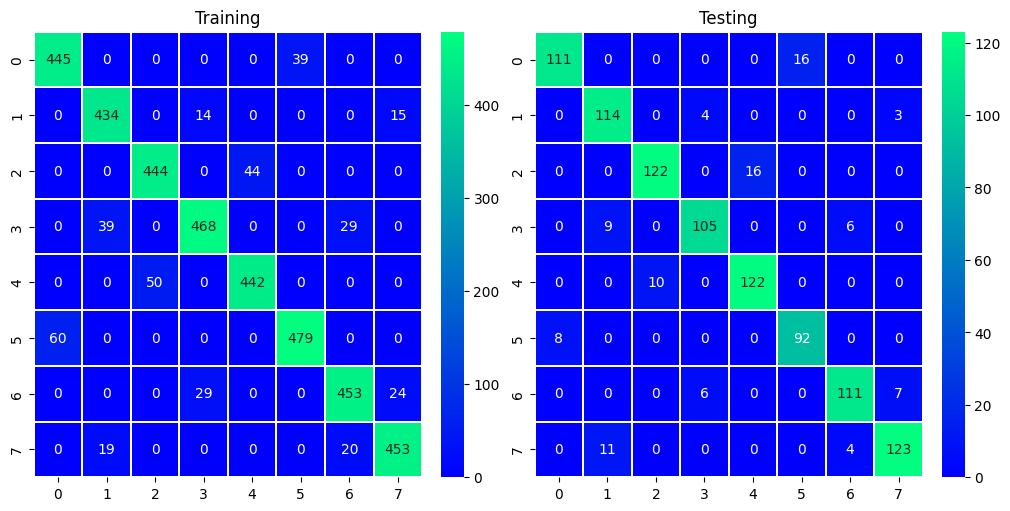

In [6]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [7]:
print(classification_report(y_test, y_pred))

                                                                                precision    recall  f1-score   support

                                    Build A Great and Strong Corporate Culture       0.93      0.87      0.90       127
                                  Business Acumen: Think, Sense & Act like CEO       0.85      0.94      0.89       121
                                      Digital Mindset & Capability Debelopment       0.92      0.88      0.90       138
How to Conduct Social Campaign (for the Benefit of HR and Corporat Reputation)       0.91      0.88      0.89       120
                            People (HR) Analytics for HR & Non HR Professional       0.88      0.92      0.90       132
                               Planning and Organizing for Stellar Performance       0.85      0.92      0.88       100
                      Professional Capability Development Towards Industry 4.0       0.92      0.90      0.91       124
                                Transfo

In [17]:
a = model.predict_proba(X_test.iloc[-1:, :])
b = ["Build A Great and Strong Corporate Culture", "Business Acumen: Think, Sense & Act like CEO", "Digital Mindset & Capability Debelopment",
     "How to Conduct Social Campaign (for the Benefit of HR and Corporat Reputation)", "People (HR) Analytics for HR & Non HR Professional",
     "Planning and Organizing for Stellar Performance", "Professional Capability Development Towards Industry 4.0", 
     "Transformasi Budaya & Manajemen Agen Perubahan"]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Build A Great and Strong Corporate Culture 41.24%
Business Acumen: Think, Sense & Act like CEO 6.13%
Digital Mindset & Capability Debelopment 6.44%
How to Conduct Social Campaign (for the Benefit of HR and Corporat Reputation) 7.04%
People (HR) Analytics for HR & Non HR Professional 6.49%
Planning and Organizing for Stellar Performance 19.50%
Professional Capability Development Towards Industry 4.0 6.67%
Transformasi Budaya & Manajemen Agen Perubahan 6.49%


In [9]:
model.predict(X_test.iloc[-1:, :])

array(['Build A Great and Strong Corporate Culture'], dtype=object)

In [10]:
y_test.iloc[-1]

'Planning and Organizing for Stellar Performance'

In [16]:
X_test.iloc[:1]["training_name"]

1501    How to Conduct Social Campaign (for the Benefi...
Name: training_name, dtype: category
Categories (8, object): ['Build A Great and Strong Corporate Culture', 'Business Acumen: Think, Sense & Act like CEO', 'Digital Mindset & Capability Debelopment', 'How to Conduct Social Campaign (for the Benef..., 'People (HR) Analytics for HR & Non HR Profess..., 'Planning and Organizing for Stellar Performance', 'Professional Capability Development Towards I..., 'Transformasi Budaya & Manajemen Agen Perubahan']